<p style="font-size:300%; text-align:center"> Telco Customer Churn modeling</p>
<p style="font-size:150%; text-align:center"> Focused customer retention programs <br> MOD3 Project - 4. Modeling</p>

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
# import important cleaned data
df = pd.read_csv("data/telco_clean.csv") # replace this 
#df.sample(6).T

In [3]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Seperate x, y and make dummy vatriables 

In [4]:
df = pd.get_dummies(df)
display(df.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No_phone', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No_internet', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No_internet',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No_internet',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No_internet',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No_internet',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaymentMethod_Bank_transfer',
       'PaymentMethod_Credit_card', 'PaymentMethod_Electronic_check',
       'Pa

In [5]:
# I manually droped the selected columns was to removes columns like "OnlineSecurity_No_internet" so the model results is more 
# interpretable 
df.drop(['gender_Female', 'MultipleLines_No_phone', 'InternetService_No', 'OnlineSecurity_No_internet',
         'OnlineBackup_No_internet', 'DeviceProtection_No_internet', 'TechSupport_No_internet', 
         'StreamingTV_No_internet', 'StreamingMovies_No_internet', 'Contract_One_year',
         'PaymentMethod_Bank_transfer'], axis=1, inplace=True)
display(df.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month_to_month', 'Contract_Two_year',
       'PaymentMethod_Credit_card', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
SeniorCitizen                     7032 non-null int64
Partner                           7032 non-null int64
Dependents                        7032 non-null int64
tenure                            7032 non-null int64
PhoneService                      7032 non-null int64
PaperlessBilling                  7032 non-null int64
MonthlyCharges                    7032 non-null float64
TotalCharges                      7032 non-null float64
Churn                             7032 non-null int64
gender_Male                       7032 non-null uint8
MultipleLines_No                  7032 non-null uint8
MultipleLines_Yes                 7032 non-null uint8
InternetService_DSL               7032 non-null uint8
InternetService_Fiber_optic       7032 non-null uint8
OnlineSecurity_No                 7032 non-null uint8
OnlineSecurity_Yes                7032 non-null uint8
OnlineBackup_No          

In [7]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

## Baseline model

__which evaluation metric is most essential for this project ?__ <br>
$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} = \frac{\text{TP}}{\text{TP+FP}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} = \frac{\text{TP}}{\text{TP+FN}}$$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} = \frac{\text{TP + TN}}{\text{TP+TN+FP+FN}}  $$

0 - not churned
1 - churned.
We want to predict churned (1) as accurately as possible. So, __FN__ is bad for us. Meaning model predict not churn but the customer actually churned. Then __recall__ is the important score for us. When evaluating between models we should pay more attention to recall and try to reduce FN as much as possible.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import plotly.graph_objs as go
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization

Using TensorFlow backend.


In [9]:
def results(model, X_train, y_train, X_test, Y_test):
    # fit model and get predictions 
    model.fit(X_train, y_train)
    #predictions
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    
    print('-'*90)
    print(model)
    
    print('-'*90)
    print('Training accuracy Score:', accuracy_score(y_train, prediction_train))
    print('Model accuracy Score:', accuracy_score(y_test, prediction_test))

    print('-'*90)
    #print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_test))
    print('Confusion Matrix:\n', pd.crosstab(y_test, prediction_test, rownames=['Actual'], colnames=['Predicted'],margins = True))

    #print('-'*60)    
    #data = {'y_Actual':    list(y_test.values),
    #        'y_Predicted': list(prediction_test)}
    #df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    #confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    ## this code is edited rest us untouched
    #fig, ax = plt.subplots(figsize=(4,4))
    #ax = sns.heatmap(confusion_matrix, annot=True, fmt='g')
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom+0.5, top-0.5)
    #plt.show()
    
    print('-'*90)
    print('Classification Matrix:')
    print(classification_report(y_test, prediction_test))
    

In [10]:
#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 

    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                      })
    return df


In [11]:
# make a test-train split
split_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=42) #stratify=y

In [12]:
# What does the split data diemention look like 
print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (3516, 30)(3516,)
Test dataset: (3516, 30)(3516,)


In [13]:
#scale features 
ss = StandardScaler()
# Scale the train and test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [14]:
# Let's create a baseline model for all models. Let's statr with as minimum amount of parameters as possible 

# LogisticRegression
name = "Logistic Regression"
logit = LogisticRegression()
model1 = model_report(logit,X_train,X_test,y_train,y_test,name)

# DecisionTree Classifier
name = "Decision Tree"
decision_tree = DecisionTreeClassifier(random_state = 0)
# X_train_resampled,X_test,y_train_resampled,y_test,name
model2 = model_report(decision_tree,X_train,X_test,y_train,y_test,name)

# KNeighborsClassifier
name = "KNN Classifier"
knn = KNeighborsClassifier(n_neighbors=3)
model3 = model_report(knn,X_train,X_test,y_train,y_test,name)

name = "Naive Bayes"
gnb = GaussianNB(priors=None)
model4 = model_report(gnb,X_train,X_test,y_train,y_test,name)

name = "Random Forest Classifier"
rfc = RandomForestClassifier(random_state=0)
model5 = model_report(rfc,X_train,X_test,y_train,y_test,name)

name = "SVM Classifier Linear"
svc  = SVC(gamma='auto', kernel='linear')
model6 = model_report(svc,X_train,X_test,y_train,y_test,name)

name = "XGBoost Classifier"
xgc = XGBClassifier()
model7 = model_report(xgc,X_train,X_test,y_train,y_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4,
                                model5,model6,model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")

data = [trace1,trace2,trace3,trace4]
go.Figure(data=data,layout=layout)


C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.802901,0.539278,0.662321,0.594500,0.719328
1,Decision Tree,0.727531,0.487261,0.491435,0.489339,0.651362
2,KNN Classifier,0.757964,0.523355,0.550838,0.536745,0.683589
3,Naive Bayes,0.749716,0.774947,0.522175,0.623932,0.757714
4,Random Forest Classifier,0.782139,0.473461,0.622905,0.537998,0.684283
5,SVM Classifier Linear,0.802617,0.535032,0.663158,0.592244,0.717788
6,XGBoost Classifier,0.797782,0.514862,0.656292,0.577037,0.708091


### Improving model with SMOTE

In [15]:
'''
smote
refre to install docs 
https://imbalanced-learn.readthedocs.io/en/stable/install.html
'''
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_smote).value_counts())

1    2589
0    2589
dtype: int64


In [16]:
# LogisticRegression
name = "Logistic Regression"
logit = LogisticRegression()
model1 = model_report(logit,X_train_smote,X_test,y_train_smote,y_test,name)

# DecisionTree Classifier
name = "Decision Tree"
decision_tree = DecisionTreeClassifier(random_state = 0)
# X_train_resampled,X_test,y_train_resampled,y_test,name
model2 = model_report(decision_tree,X_train_smote,X_test,y_train_smote,y_test,name)

# KNeighborsClassifier
name = "KNN Classifier"
knn = KNeighborsClassifier(n_neighbors=3)
model3 = model_report(knn,X_train_smote,X_test,y_train_smote,y_test,name)

name = "Naive Bayes"
gnb = GaussianNB(priors=None)
model4 = model_report(gnb,X_train_smote,X_test,y_train_smote,y_test,name)

name = "Random Forest Classifier"
rfc = RandomForestClassifier(random_state=0)
model5 = model_report(rfc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "SVM Classifier Linear"
svc  = SVC(gamma='auto', kernel='linear')
model6 = model_report(svc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "XGBoost Classifier"
xgc = XGBClassifier()
model7 = model_report(xgc,X_train_smote,X_test,y_train_smote,y_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4,
                                model5,model6,model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")

data = [trace1,trace2,trace3,trace4]
go.Figure(data=data,layout=layout)


C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.750853,0.794055,0.523077,0.630691,0.764549
1,Decision Tree,0.707622,0.543524,0.461261,0.499025,0.655601
2,KNN Classifier,0.690842,0.664544,0.448103,0.535271,0.682505
3,Naive Bayes,0.740330,0.782378,0.510035,0.617512,0.753660
4,Random Forest Classifier,0.777304,0.545648,0.591484,0.567642,0.703865
5,SVM Classifier Linear,0.725256,0.809979,0.492258,0.612360,0.752114
6,XGBoost Classifier,0.788396,0.671975,0.592697,0.629851,0.751488


with SMOTE we can see that the model accuray score reduces a little but the __recall__ improves considerablly. As recall is the main evaluation metric of interest for churn dataset it is better to use SMOTE. 
From the evaluation comparison above clearly Logistic regression and SVM classifiers give the best performance and worth exploring further. However, since XGboots is been known to perform well with the correct set of hyper parameters let's explot XGboost further as well. 

## Improving model accuracy 

In [17]:
def get_pl(name, classifier, parms):
    # function
    pl = Pipeline([(name, classifier)])

    gs = GridSearchCV(pl, parms, scoring='recall', cv=5, n_jobs=-1)

    gs.fit(X_train_smote, y_train_smote)

    best_parameters = gs.best_params_

    print("Grid Search found the following optimal parameters: ")
    for param_name in sorted(best_parameters.keys()):
        print("%s: %r" % (param_name, best_parameters[param_name]))

    training_preds = gs.predict(X_train_smote)
    val_preds = gs.predict(X_test)
    training_recall = recall_score(y_train_smote, training_preds)
    val_recall = recall_score(y_test, val_preds)

    print("")
    print("Training recall: {:.4}%".format(training_recall * 100))
    print("Validation recall: {:.4}%".format(val_recall * 100))
    return None

### Logistic Regression

Following parameters maybe set and changed to get better accuracy 

* "penalty": 'l2' => Churn dataset have lot of multicoliniarity
* 'C': [100, 10, 1, 0.1, 0.01, 0.001]  => have to test strenth of regularization is best
* 'fit_intercept': True,   
* 'random_state': [11],
* 'solver': 'liblinear',
* 'max_iter': [200]


In [18]:
# call function 
param_grid = {    
    "logit__penalty": ['l2'],
    'logit__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logit__fit_intercept': [True, False],
    'logit__random_state': [11],
    'logit__solver': ['liblinear'],
    'logit__max_iter': [200],
}

get_pl('logit', LogisticRegression(), param_grid)

Grid Search found the following optimal parameters: 
logit__C: 100
logit__fit_intercept: False
logit__max_iter: 200
logit__penalty: 'l2'
logit__random_state: 11
logit__solver: 'liblinear'

Training recall: 90.77%
Validation recall: 87.37%


In [19]:
# after Gridsearch
logreg_1 = LogisticRegression(C=1, fit_intercept= False, max_iter= 200, penalty= 'l2', 
                              random_state= 11, solver= 'liblinear')
#logreg_1.fit(X_train_smote, y_train_smote)

#predictions
#prediction_train = logreg_1.predict(X_train)
#prediction_test = logreg_1.predict(X_test)

# model results
results(logreg_1, X_train_smote, y_train_smote, X_test, y_test)

------------------------------------------------------------------------------------------
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=11, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.7632290459636926
Model accuracy Score: 0.6891353811149032
------------------------------------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          1600   974  2574
1           119   823   942
All        1719  1797  3516
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-scor

Train AUC: 0.8464564419294475
Test AUC: 0.8411761333735857


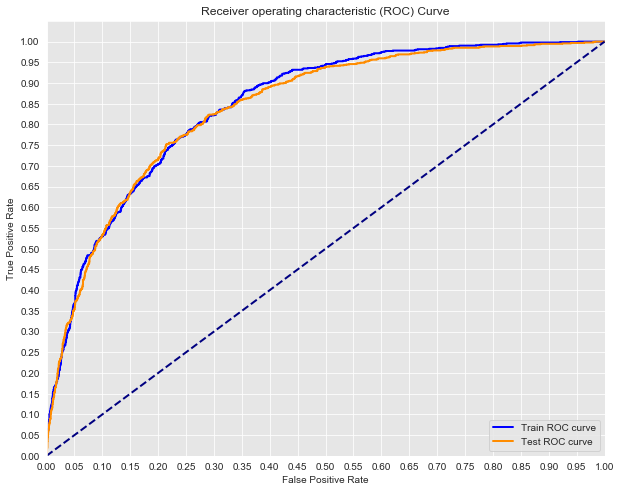

In [20]:
y_score_test = logreg_1.decision_function(X_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score_test)

y_score_train = logreg_1.decision_function(X_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_score_train)

# Train AUC
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

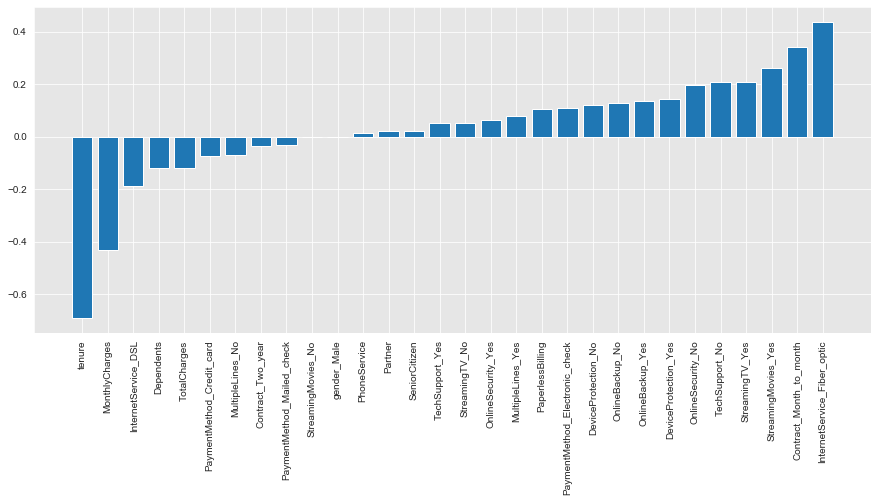

In [21]:
weights_LogReg = pd.Series(logreg_1.coef_[0], index=X.columns.values)
weights_LogReg.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features=plt.bar(weights_LogReg.index,weights_LogReg.values)

## SVM

Following parameters maybe set and changed to get better accuracy 

* kernal: [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
* C:  [100, 10, 1, 0.1, 0.01, 0.001] => how soft is the soft margin. low C means errors matter less
* degree: [2, 3] => highest order of poly kernal. ignored for other kernals 
* 'tol': [1e-4] => stopping criterion increased a little here



In [22]:
# Pipeline par grid for SVC
param_grid = {    
    'svm__kernel': ['linear', 'poly', 'rbf'],
    'svm__C': [100, 0.1, 0.01, 0.001],
    'svm__degree': [2, 3],
    'svm__tol': [1e-4],
    'svm__gamma': ['auto'],
}

get_pl('svm', SVC(), param_grid)



#param_grid = {
#    'svm__kernel': ['linear', 'poly', 'rbf'],
#    'svm__C': [100, 0.1, 0.01, 0.001],
#    'svm__degree': [2, 3],
#    'svm__tol': [1e-4],
#    'svm__gamma': ['auto'],
#}

# pl = Pipeline([('svm', SVC())])

# gs = GridSearchCV(pl, param_grid, scoring='recall', cv=5, n_jobs=-1)

# gs.fit(X_train_smote, y_train_smote)

# best_parameters = gs.best_params_

# print("Grid Search found the following optimal parameters: ")
# for param_name in sorted(best_parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))

# training_preds = gs.predict(X_train_smote)
# val_preds = gs.predict(X_test)
# training_recall = recall_score(y_train_smote, training_preds)
# val_recall = recall_score(y_test, val_preds)

# print("")
# print("Training recall: {:.4}%".format(training_recall * 100))
# print("Validation recall: {:.4}%".format(val_recall * 100))

Grid Search found the following optimal parameters: 
svm__C: 0.001
svm__degree: 3
svm__gamma: 'auto'
svm__kernel: 'poly'
svm__tol: 0.0001

Training recall: 99.15%
Validation recall: 98.3%


In [23]:
# accuracy matric of the best set of parameters  
clf_svm_1 = SVC(kernel ='poly', C=0.001, degree= 3,  tol = 0.0001, gamma = 'auto')

results(clf_svm_1, X_train_smote, y_train_smote, X_test, y_test)

------------------------------------------------------------------------------------------
SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.5867130166087292
Model accuracy Score: 0.39618885096700796
------------------------------------------------------------------------------------------
Confusion Matrix:
 Predicted    0     1   All
Actual                    
0          467  2107  2574
1           16   926   942
All        483  3033  3516
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.18      0.31      2574
           1       0.31      

In [24]:
# coef_[0] is only available for linear kernals 
#weights_svm = pd.Series(clf_svm_1.coef_[0], index=X.columns.values)
#weights_svm.sort_values(inplace=True)
#plt.figure(figsize=(15, 6))
#plt.xticks(rotation=90)
#features=plt.bar(weights_svm.index,weights_svm.values)


### XGBoost

In [25]:
param_grid = {    
    'xgb__learning_rate': [0.1],
    'xgb__max_depth': [3, 9, 12],
    'xgb__min_child_weight': [10, 18],
    'xgb__subsample': [0.3, 0.9],
    'xgb__n_estimators': [5, 30, 100, 250],
}

get_pl('xgb', XGBClassifier(), param_grid)

Grid Search found the following optimal parameters: 
xgb__learning_rate: 0.1
xgb__max_depth: 3
xgb__min_child_weight: 18
xgb__n_estimators: 5
xgb__subsample: 0.3

Training recall: 88.68%
Validation recall: 83.33%


In [26]:

#clf_xgb = XGBClassifier()
#param_grid = {
#    "learning_rate": [0.1],
#    'max_depth': [3, 9, 12],
#    'min_child_weight': [10, 18],
#    'subsample': [0.3, 0.9],
#    'n_estimators': [5, 30, 100, 250],
#}
#grid_clf = GridSearchCV(clf_xgb, param_grid, scoring='recall', cv=5, n_jobs=-1)
#grid_clf.fit(X_train_smote, y_train_smote)

#best_parameters = grid_clf.best_params_

#print("Grid Search found the following optimal parameters: ")
#for param_name in sorted(best_parameters.keys()):
#    print("%s: %r" % (param_name, best_parameters[param_name]))

#training_preds = grid_clf.predict(X_train_smote)
#val_preds = grid_clf.predict(X_test)
#training_accuracy = recall_score(y_train_smote, training_preds)
#val_accuracy = recall_score(y_test, val_preds)

#print("")
#print("Training recall: {:.4}%".format(training_accuracy * 100))
#print("Validation recall: {:.4}%".format(val_accuracy * 100))

In [27]:
# Create XBoost classifer object
clf_xgb = XGBClassifier()
results(clf_xgb, X_train_smote, y_train_smote, X_test, y_test)

------------------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.8646195442255697
Model accuracy Score: 0.78839590443686
------------------------------------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          2139   435  2574
1           309   633   942
All        2448  1068  3516
---------------

## Decision Tree

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
results(clf, X_train_smote, y_train_smote, X_test, y_test)

------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
------------------------------------------------------------------------------------------
Training accuracy Score: 0.8005021243723446
Model accuracy Score: 0.7627986348122867
------------------------------------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          2036   538  2574
1           296   646   942
All        2332  1184  3516
------------------------------------------------------------------------------

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



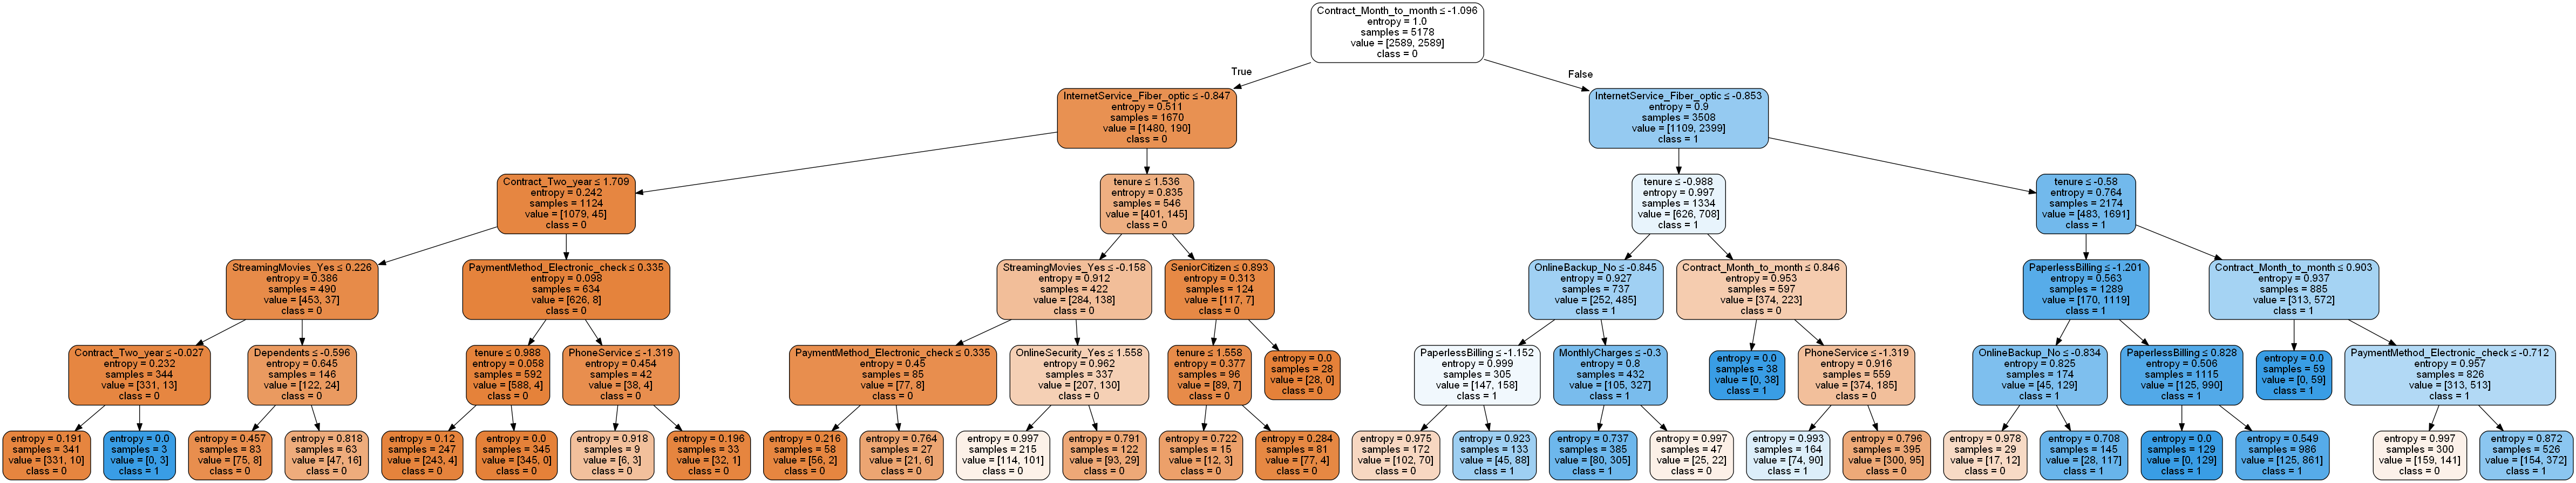

In [29]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

col_names = list(X.columns)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('img/tree1.png')
Image(graph.create_png())

## Feature engineering
Can we change or remove columns to remove colliniarity and improve accuracy 

In [30]:
import statsmodels.api as sm
# statsmodels has inbuilt MLE methods and easy to get the most important features based on p-values
# Create intercept term required for sm.Logit, see documentation for more information
X_sm = X
y_sm = y
X_sm = sm.add_constant(X_sm)

# Fit model
logit_model = sm.Logit(y_sm, X_sm)

# Get results of the fit
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.414269
         Iterations 21


C:\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning:

invalid value encountered in sqrt

C:\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

C:\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

C:\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7008
Method:                           MLE   Df Model:                           23
Date:                Sun, 31 May 2020   Pseudo R-squ.:                  0.2845
Time:                        17:59:00   Log-Likelihood:                -2913.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2818      0.232     -5.528      0.000      -1.736      -0.827
SeniorCitizen                      0.2168      0.085      2.564      0.010       0.051       0.382
Partner                           -0.0004      0.078     -0.005      0.996      -0.153       0.152
Dependents                        -0.1485      0.090     -1.655      0.098      -0.324       0.027
tenure                            -0.0606      0.006     -9.716      0.000      -0.073      -0.048
PhoneService                       0.2638   3.08e+06   8.56e-08      1.000   -6.04e+06    6.04e+06
PaperlessBilling                   0.3424      0.074      4.596      0.000       0.196       0.488
MonthlyCharges                    -0.0403      0.032     -1.270      0.204      -0.103       0.022
TotalCharges                       0.0003   7.06e-05      4.657      0.000       0.000       0.000
gender_Male                       -0.0218      0.065     -0.337      0.736      -0.149       0.105
MultipleLines_No                  -0.0923   3.12e+06  -2.96e-08      1.000   -6.12e+06    6.12e+06
MultipleLines_Yes                  0.3561   3.06e+06   1.16e-07      1.000      -6e+06       6e+06
InternetService_DSL               -0.0900    5.4e+06  -1.67e-08      1.000   -1.06e+07    1.06e+07
InternetService_Fiber_optic        1.6575   5.44e+06   3.05e-07      1.000   -1.07e+07    1.07e+07
OnlineSecurity_No                  0.3696    3.1e+06   1.19e-07      1.000   -6.07e+06    6.07e+06
OnlineSecurity_Yes                 0.1642    3.2e+06   5.13e-08      1.000   -6.27e+06    6.27e+06
OnlineBackup_No                    0.2525   2.08e+06   1.21e-07      1.000   -4.08e+06    4.08e+06
OnlineBackup_Yes                   0.2786   1.94e+06   1.44e-07      1.000    -3.8e+06     3.8e+06
DeviceProtection_No                0.4726   2.56e+06   1.84e-07      1.000   -5.02e+06    5.02e+06
DeviceProtection_Yes               0.6200   2.85e+06   2.17e-07      1.000   -5.59e+06    5.59e+06
TechSupport_No                     0.4941        nan        nan        nan         nan         nan
TechSupport_Yes                    0.3136        nan        nan        nan         nan         nan
StreamingTV_No                     0.1373   2.68e+06   5.12e-08      1.000   -5.26e+06    5.26e+06
StreamingTV_Yes                    0.7278   2.68e+06   2.71e-07      1.000   -5.26e+06    5.26e+06
StreamingMovies_No                 0.1502   2.44e+06   6.15e-08      1.000   -4.79e+06    4.79e+06
StreamingMovies_Yes                0.7495   2.44e+06   3.07e-07      1.000   -4.79e+06    4.79e+06
Contract_Month_to_month            0.6608      0.108      6.142      0.000       0.450       0.872
Contract_Two_year                 -0.6963      0.177     -3.944      0.000      -1.042      -0.350
PaymentMethod_Credit_card         -0.0878      0.114     -0.770      0.442      -0.311       0.136
PaymentMethod_Electronic_check     0.3045      0.094      3.222      0.00

In [31]:
#X_sm.drop(['Partner', 'Dependents', 'PhoneService', 'MonthlyCharges','gender_Male', 'MultipleLines_No',
#           'MultipleLines_Yes','InternetService_DSL', 'InternetService_Fiber_optic', 'OnlineSecurity_No',
#           'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes','DeviceProtection_No', 'DeviceProtection_Yes',
#           'TechSupport_No','TechSupport_Yes', 'StreamingTV_No','StreamingTV_Yes', 'StreamingMovies_No', 
#           'StreamingMovies_Yes', 'PaymentMethod_Credit_card', 
#           'PaymentMethod_Mailed_check'], axis=1, inplace=True)

X_sm = X_sm[['tenure', 'TotalCharges', 'SeniorCitizen', 'PhoneService', 'MultipleLines_No', 
             'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_DSL', 
             'Contract_Month_to_month', 'Contract_Two_year','PaperlessBilling', 'PaymentMethod_Electronic_check']]
display(X_sm.columns)

Index(['tenure', 'TotalCharges', 'SeniorCitizen', 'PhoneService',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_Fiber_optic',
       'InternetService_DSL', 'Contract_Month_to_month', 'Contract_Two_year',
       'PaperlessBilling', 'PaymentMethod_Electronic_check'],
      dtype='object')

In [32]:
split_size = 0.5
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm,y_sm,test_size=split_size,random_state=42)
smote = SMOTE()
X_sm_train_smote, y_sm_train_smote = smote.fit_sample(X_sm_train, y_sm_train) 
print(pd.Series(y_train_smote).value_counts())

1    2589
0    2589
dtype: int64


In [33]:
# Create Decision Tree classifer object
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion= 'entropy', 
                                max_depth= 20, min_samples_leaf= 15, 
                                min_samples_split= 50)
results(forest, X_sm_train_smote, y_sm_train_smote, X_sm_test, y_sm_test)

------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.8588258014677481
Model accuracy Score: 0.7790102389078498
------------------------------------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          2153   421  2574
1           356   586   942
All        2509  1